### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [1]:
import pandas as pd

df = pd.read_csv('./uber-raw-data-aug14.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [2]:
# Convert the 'Date/Time' column to datetime format
df['Date/Time'] =  pd.to_datetime(df['Date/Time'])


In [6]:
# Group by date and count the number of pickups
pickups_by_date =  df.groupby(df['Date/Time'].dt.date).size()

# Find the date with the highest number of pickups
result =  pickups_by_date.idxmax()
print('Date with the most number of uber pickups', result)
print('Values', pickups_by_date.max())


Date with the most number of uber pickups 2014-08-07
Values 32759


#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [8]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups


# Get the count of pickups on the highest date

print('Number of uber pickups on the date with the highest of pickups', pickups_by_date.max())


Number of uber pickups on the date with the highest of pickups 32759


#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [10]:
# Count the number of unique TLC base companies
print('Number of unique TLC base companies', df['Base'].nunique())




Number of unique TLC base companies 5


#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [14]:
# Group by TLC base company and count the number of pickups
pickups_by_company =  df.groupby('Base').size()
print(pickups_by_company.max())

# Find the TLC base company with the highest number of pickups
result = pickups_by_company.idxmax()
print("TLC base company with the highest number of pickups:",result)


355803
TLC base company with the highest number of pickups: B02617


#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [15]:
# Group by TLC base company and count the number of pickups

df.groupby('Base').size()


Base
B02512     31472
B02598    220129
B02617    355803
B02682    173280
B02764     48591
dtype: int64

#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [18]:
# Extract the hour from the 'Date/Time' column
df['Hour'] =  df['Date/Time'].dt.hour

# Group by hour and count the number of pickups
pickups_by_date = df.groupby(df['Hour']).size()


# Find the hour with the highest number of pickups
result =  pickups_by_date .idxmax()
print('Busiest time of the day for uber pickus (hour):', result)



Busiest time of the day for uber pickus (hour): 17


#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function

Text(0.5, 1.0, 'Number of Uber pickups over time')

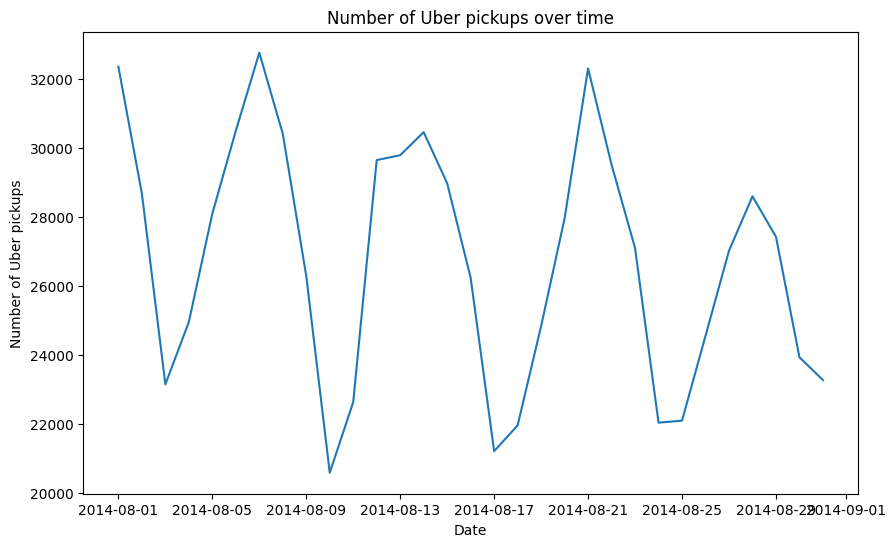

In [20]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups
pickups_by_date =  df.groupby(df['Date/Time'].dt.date).size()

# Create a line plot to visualize the number of pickups over time
pickups_by_date.plot(kind =  'line', figsize = (10,6))
plt.xlabel('Date')
plt.ylabel('Number of Uber pickups')
plt.title('Number of Uber pickups over time')

#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

Text(0.5, 1.0, 'Distribution of uber pickups by Latitude')

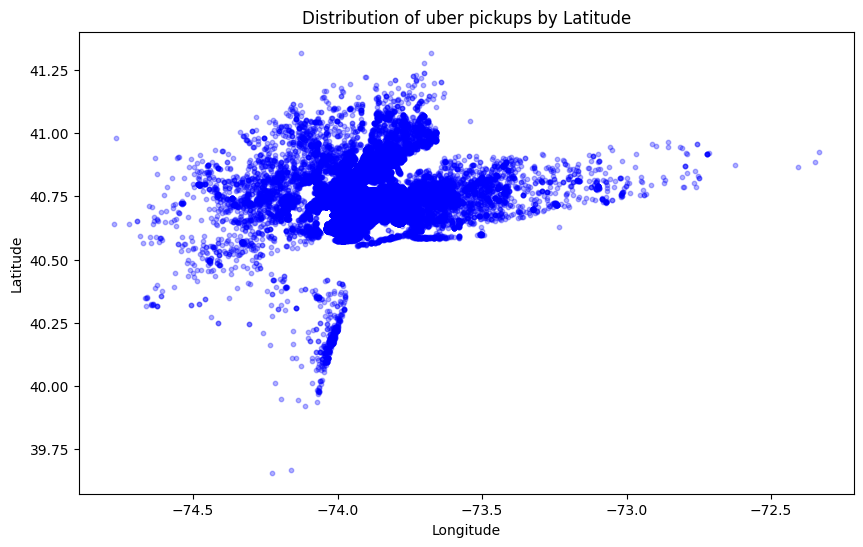

In [22]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
plt.figure(figsize = (10,6))
plt.scatter(df['Lon'], df['Lat'], s = 10, alpha = 0.3, color= 'blue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of uber pickups by Latitude')

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

Text(0.5, 1.0, 'Number of Uber pickups by TLC Base Company')

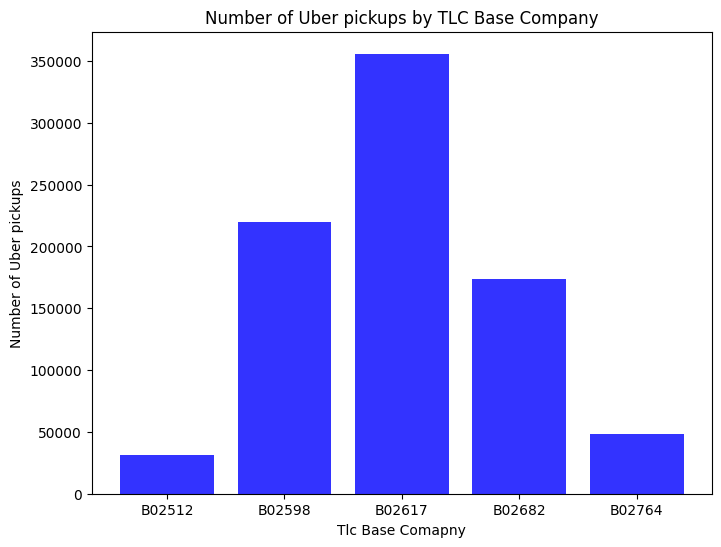

In [29]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
pickups_by_base =  df.groupby('Base').size()
plt.figure(figsize = (8,6))
plt.bar(pickups_by_base.index, pickups_by_base.values, alpha = 0.8, color=  'blue')
plt.xlabel('Tlc Base Comapny')
plt.ylabel('Number of Uber pickups')
plt.title('Number of Uber pickups by TLC Base Company')

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

Text(0.5, 1.0, 'Percentage Distibutions of Uber Pickups by day of the Week')

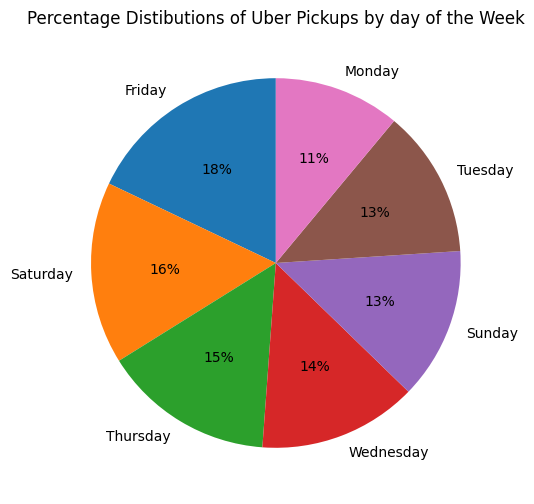

In [36]:
# Group by day of the week and count the number of pickups
dickups_by_day =  df['Date/Time'].dt.day_name().value_counts()

plt.figure(figsize = (8,6))

# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
plt.pie(x =  dickups_by_day.values, labels =  dickups_by_day.index, autopct = '%1.f%%', startangle = 90)
plt.title('Percentage Distibutions of Uber Pickups by day of the Week')